In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from collections import Counter
from sklearn.cluster import Birch
import pandas as pd
from src.utils_clustering import *

In [31]:
N_CLASSES = 15

In [32]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [33]:
birch_clustering = Birch(n_clusters=N_CLASSES, threshold=0.05)
labels_pred = birch_clustering.fit_predict(processed_data)

In [34]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution, len(cluster_distribution))

Predicted Distribution:  Counter({10: 355, 5: 353, 1: 352, 7: 352, 4: 347, 14: 341, 8: 338, 2: 336, 12: 333, 13: 324, 9: 322, 11: 319, 6: 316, 3: 313, 0: 299}) 15


In [35]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [36]:
clustering_algorithm_name = 'Birch_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

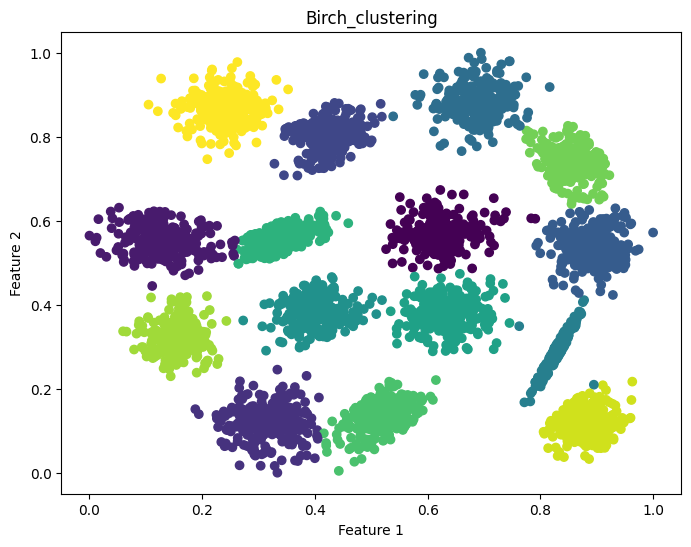

In [37]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [38]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


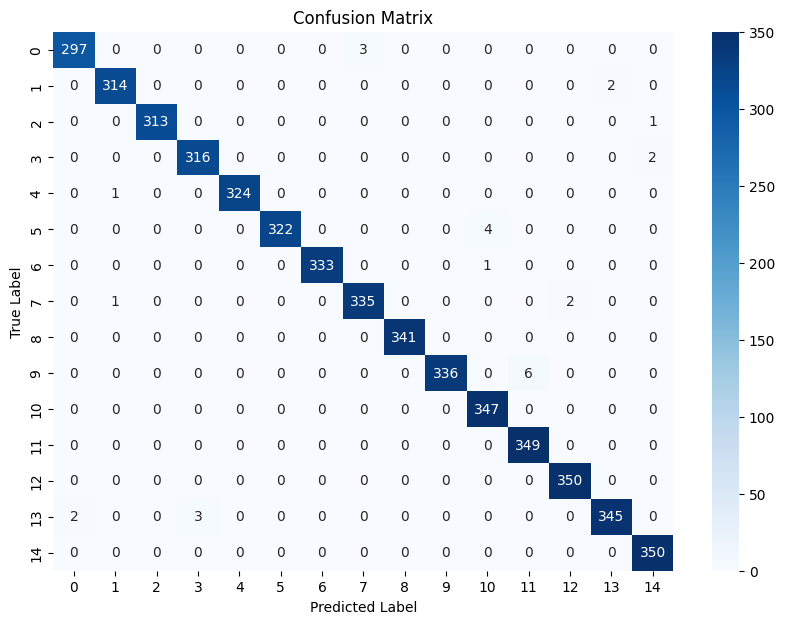

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 99.00%
Cluster 2 Accuracy: 99.37%
Cluster 3 Accuracy: 99.68%
Cluster 4 Accuracy: 99.37%
Cluster 5 Accuracy: 99.69%
Cluster 6 Accuracy: 98.77%
Cluster 7 Accuracy: 99.70%
Cluster 8 Accuracy: 99.11%
Cluster 9 Accuracy: 100.00%
Cluster 10 Accuracy: 98.25%
Cluster 11 Accuracy: 100.00%
Cluster 12 Accuracy: 100.00%
Cluster 13 Accuracy: 100.00%
Cluster 14 Accuracy: 98.57%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 99.44%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [39]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [40]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path)

Timestamp: 2024-02-06 23:46:05.030305
Dataset: s1
Clustering Algorithm: Birch_clustering
Accuracy: 0.9944


In [41]:
# TODO: Save clustering algorithm parameters to the csv